In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
infile = "./m_annot_data_stat_table.csv"

In [41]:
p_threshold = 0.05
mydata = pd.read_csv(infile)

In [42]:
mydata.index = mydata['BinBase name']

In [43]:
mydata.annotated_name_KEGG[0:5]

BinBase name
xylose                                      xylose
xylitol                                    xylitol
valine                                      valine
uridine-5-monophosphate    uridine-5-monophosphate
uridine                                    uridine
Name: annotated_name_KEGG, dtype: object

In [44]:
mydata.columns

Index(['MID', 'annotated_KEGG_name', 'annotated_name_KEGG', 'BinBase name',
       'ret.index', 'quant mz', 'BB id', 'mass spec', 'PubChem', 'KEGG',
       'InChI Key', 'C2_B6.1_Tfh_007', 'C2_B6.2_Tfh_008', 'C2_B6.4_Tfh_009',
       'C2_B6.6_Tfh_010', 'C2_B6.7_Tfh_011', 'C2_B6.8_Tfh_012',
       'C2_B6.1_Tn_001', 'C2_B6.2_Tn_002', 'C2_B6.4_Tn_003', 'C2_B6.6_Tn_004',
       'C2_B6.7_Tn_005', 'C2_B6.8_Tn_006', 'C1_B6.1_Tfh_004', 'C1_B6.1_Tn_001',
       'C1_B6.2_Tfh_005', 'C1_B6.2_Tn_002', 'C1_B6.3_Tfh_006',
       'C1_B6.3_Tn_003', 'C1_TC.1_Tfh_010', 'C1_TC.1_Tn_007',
       'C1_TC.2_Tfh_011', 'C1_TC.2_Tn_008', 'C1_TC.2_Tn_009',
       'C1_TC.3_Tfh_012', 'C2_TC.1_Tfh_018', 'C2_TC.2_Tfh_019',
       'C2_TC.3_Tfh_020', 'C2_TC.4_Tfh_021', 'C2_TC.1_Tn_013',
       'C2_TC.2_Tn_014', 'C2_TC.3_Tn_015', 'C2_TC.4_Tn_016', 'TC_Tfh_geoMean',
       'B6_Tfh_geoMean', 'TC_Tn_geoMean', 'B6_Tn_geoMean', 'log2FC_Tfh_TCvsB6',
       'log2FC_Tn_TCvsB6', 'log2FC_TC_TfhvsTn', 'log2FC_B6_TfhvsTn',
       't

# one-way anova with adjusted p value = 0.05

In [66]:
p_threshold = 0.05
mydata = pd.read_csv(infile)

mydata.index = mydata['BinBase name']

mydata.columns[11:43]

Index(['C2_B6.1_Tfh_007', 'C2_B6.2_Tfh_008', 'C2_B6.4_Tfh_009',
       'C2_B6.6_Tfh_010', 'C2_B6.7_Tfh_011', 'C2_B6.8_Tfh_012',
       'C2_B6.1_Tn_001', 'C2_B6.2_Tn_002', 'C2_B6.4_Tn_003', 'C2_B6.6_Tn_004',
       'C2_B6.7_Tn_005', 'C2_B6.8_Tn_006', 'C1_B6.1_Tfh_004', 'C1_B6.1_Tn_001',
       'C1_B6.2_Tfh_005', 'C1_B6.2_Tn_002', 'C1_B6.3_Tfh_006',
       'C1_B6.3_Tn_003', 'C1_TC.1_Tfh_010', 'C1_TC.1_Tn_007',
       'C1_TC.2_Tfh_011', 'C1_TC.2_Tn_008', 'C1_TC.2_Tn_009',
       'C1_TC.3_Tfh_012', 'C2_TC.1_Tfh_018', 'C2_TC.2_Tfh_019',
       'C2_TC.3_Tfh_020', 'C2_TC.4_Tfh_021', 'C2_TC.1_Tn_013',
       'C2_TC.2_Tn_014', 'C2_TC.3_Tn_015', 'C2_TC.4_Tn_016'],
      dtype='object')

In [67]:
filt_df = mydata.loc[
          (mydata.padj_lim_ftest_fscore < p_threshold),:] #

d = filt_df.iloc[:,np.r_[11:43]] #
d.shape[0]

25

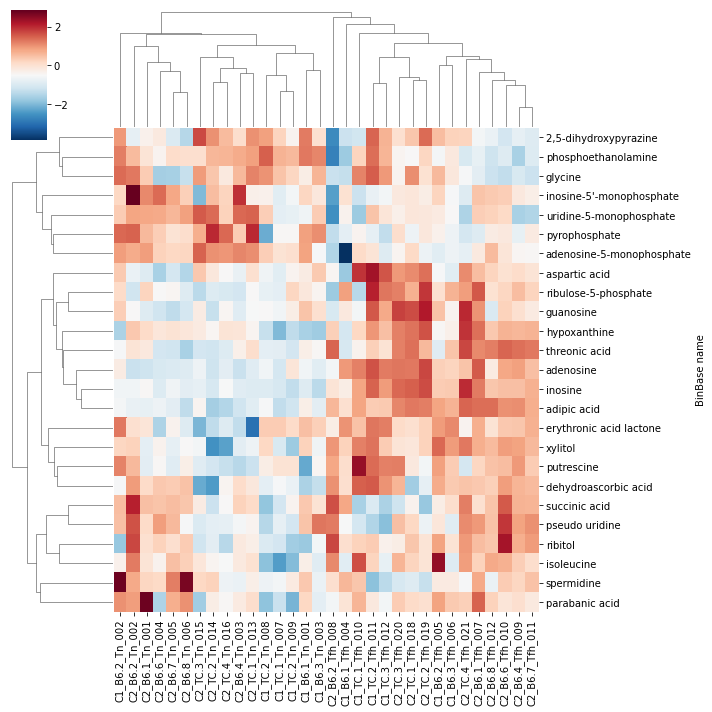

In [68]:
g = sns.clustermap(d,col_cluster=True, z_score=0,cmap="RdBu_r") 
plt.show()

g.savefig("one_way_anova_padj_" + str(p_threshold) + ".pdf", bbox_inches='tight') #

# one way anova with less stringent threshold 0.25

In [72]:
p_threshold = 0.25
mydata = pd.read_csv(infile)

mydata.index = mydata['BinBase name']

mydata.columns[11:43]

Index(['C2_B6.1_Tfh_007', 'C2_B6.2_Tfh_008', 'C2_B6.4_Tfh_009',
       'C2_B6.6_Tfh_010', 'C2_B6.7_Tfh_011', 'C2_B6.8_Tfh_012',
       'C2_B6.1_Tn_001', 'C2_B6.2_Tn_002', 'C2_B6.4_Tn_003', 'C2_B6.6_Tn_004',
       'C2_B6.7_Tn_005', 'C2_B6.8_Tn_006', 'C1_B6.1_Tfh_004', 'C1_B6.1_Tn_001',
       'C1_B6.2_Tfh_005', 'C1_B6.2_Tn_002', 'C1_B6.3_Tfh_006',
       'C1_B6.3_Tn_003', 'C1_TC.1_Tfh_010', 'C1_TC.1_Tn_007',
       'C1_TC.2_Tfh_011', 'C1_TC.2_Tn_008', 'C1_TC.2_Tn_009',
       'C1_TC.3_Tfh_012', 'C2_TC.1_Tfh_018', 'C2_TC.2_Tfh_019',
       'C2_TC.3_Tfh_020', 'C2_TC.4_Tfh_021', 'C2_TC.1_Tn_013',
       'C2_TC.2_Tn_014', 'C2_TC.3_Tn_015', 'C2_TC.4_Tn_016'],
      dtype='object')

In [73]:
filt_df = mydata.loc[
          (mydata.padj_lim_ftest_fscore < p_threshold),:] #

d = filt_df.iloc[:,np.r_[11:43]] #
d.shape[0]

42

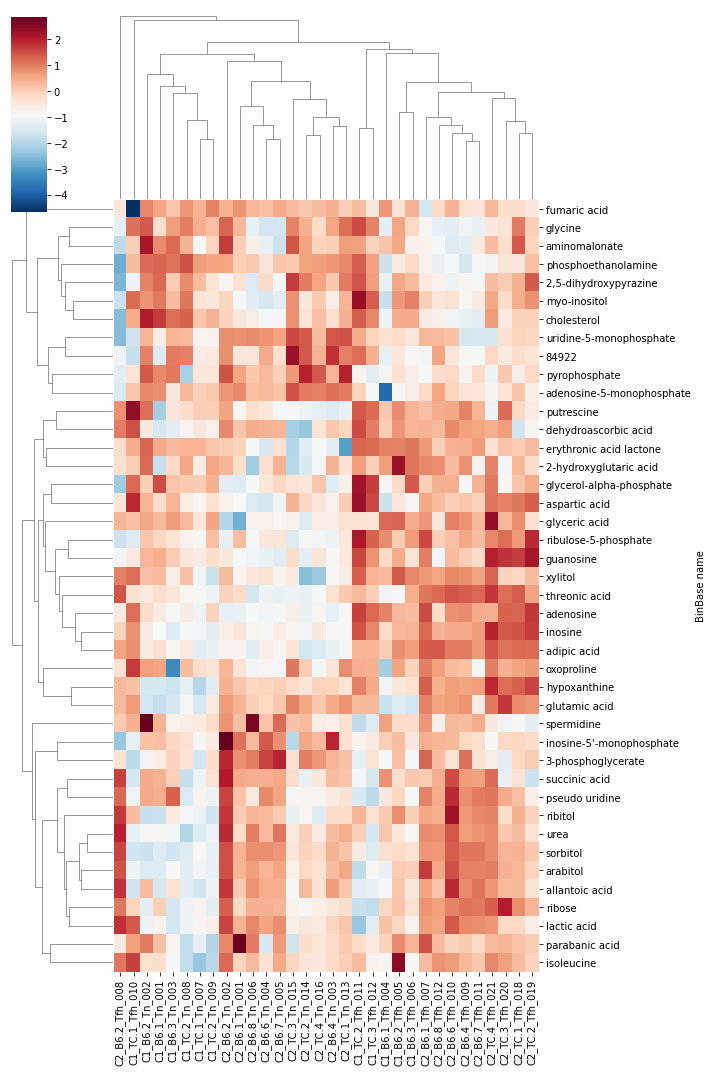

In [76]:
g = sns.clustermap(d,col_cluster=True, z_score=0,cmap="RdBu_r",figsize=(10,15)) 
plt.show()

g.savefig("one_way_anova_padj_" + str(p_threshold) + ".pdf", bbox_inches='tight') #

# 2-way anova interaction terms.

/Users/gongm/opt/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:1204: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout(**tight_params)


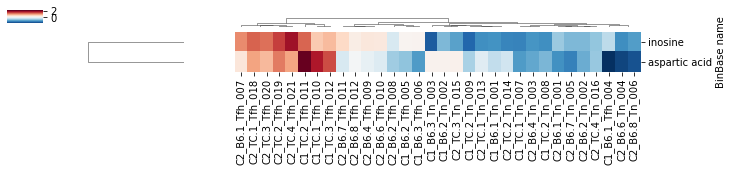

In [56]:
p_threshold = 0.25 # 0.05 delivers no significant results
mydata = pd.read_csv(infile)

mydata.index = mydata['BinBase name']

mydata.columns[11:43]

filt_df = mydata.loc[(mydata.padj_lim_X2wayAnova_pval< p_threshold),:]

d = filt_df.iloc[:,11:43]

g = sns.clustermap(d,col_cluster=True, z_score=0, figsize=(10, 1),cmap="RdBu_r")
plt.show()

g.savefig("interaction_padj_" + str(p_threshold) + ".pdf", bbox_inches='tight')

# only TCvsB6 in Tn

In [50]:
mydata[[x for x in mydata.columns if re.search("B6\.\d_*Tn",x) 
        or re.search("TC\.\d_*Tn",x)]].columns

Index(['C2_B6.1_Tn_001', 'C2_B6.2_Tn_002', 'C2_B6.4_Tn_003', 'C2_B6.6_Tn_004',
       'C2_B6.7_Tn_005', 'C2_B6.8_Tn_006', 'C1_B6.1_Tn_001', 'C1_B6.2_Tn_002',
       'C1_B6.3_Tn_003', 'C1_TC.1_Tn_007', 'C1_TC.2_Tn_008', 'C1_TC.2_Tn_009',
       'C2_TC.1_Tn_013', 'C2_TC.2_Tn_014', 'C2_TC.3_Tn_015', 'C2_TC.4_Tn_016'],
      dtype='object')

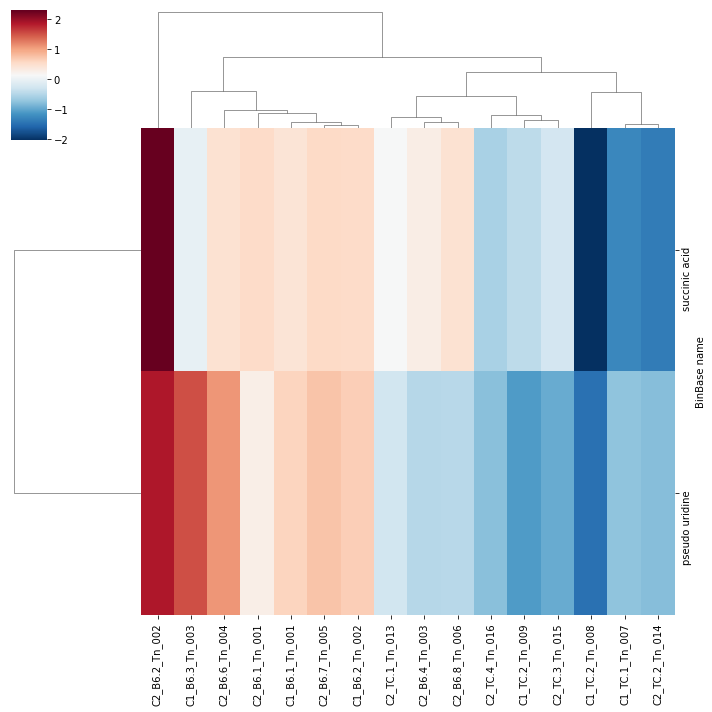

In [51]:
p_threshold = 0.1 # 0.05 delivers no significant results
mydata = pd.read_csv(infile)

mydata.index = mydata['BinBase name']

filt_df = mydata.loc[
          (mydata.padj_lim_ttest_tscore__TC_TnvsB6_Tn < p_threshold),:]

d = filt_df.loc[:,[x for x in mydata.columns if re.search("B6\.\d_*Tn",x) 
        or re.search("TC\.\d_*Tn",x)]]

g = sns.clustermap(d,col_cluster=True, z_score=0,cmap="RdBu_r", )
plt.show()

g.savefig("Tn_TCvsB6_padj_" + str(p_threshold) + ".pdf", bbox_inches='tight')

# only TCvsB6 in Tfh

In [52]:
mydata[[x for x in mydata.columns if re.search("B6\.\d_*Tfh",x) 
        or re.search("TC\.\d_*Tfh",x)]].columns

Index(['C2_B6.1_Tfh_007', 'C2_B6.2_Tfh_008', 'C2_B6.4_Tfh_009',
       'C2_B6.6_Tfh_010', 'C2_B6.7_Tfh_011', 'C2_B6.8_Tfh_012',
       'C1_B6.1_Tfh_004', 'C1_B6.2_Tfh_005', 'C1_B6.3_Tfh_006',
       'C1_TC.1_Tfh_010', 'C1_TC.2_Tfh_011', 'C1_TC.3_Tfh_012',
       'C2_TC.1_Tfh_018', 'C2_TC.2_Tfh_019', 'C2_TC.3_Tfh_020',
       'C2_TC.4_Tfh_021'],
      dtype='object')

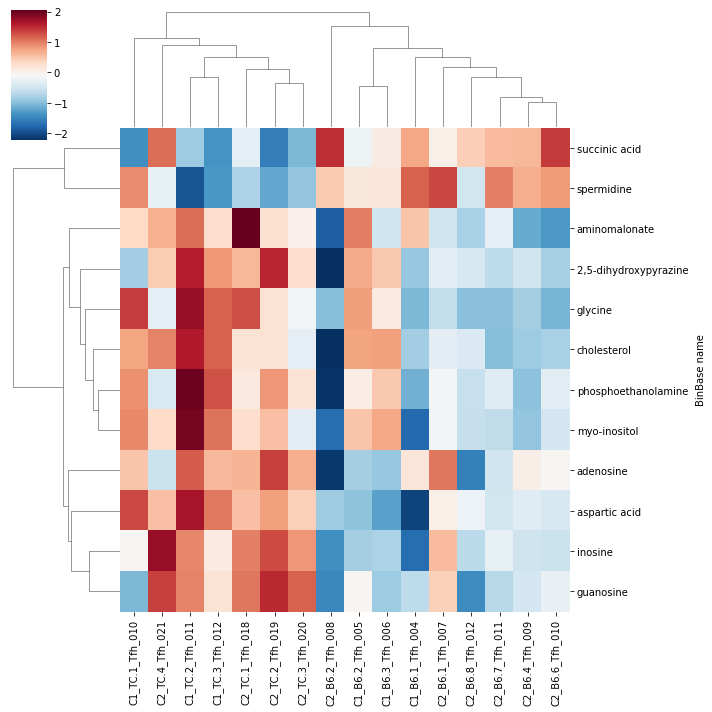

In [53]:
p_threshold = 0.15 #
mydata = pd.read_csv(infile)

mydata.index = mydata['BinBase name']

filt_df = mydata.loc[
          (mydata.padj_lim_ttest_tscore__TC_TfhvsB6_Tfh < p_threshold),:] #

d = filt_df.loc[:,[x for x in mydata.columns if re.search("B6\.\d_*Tfh",x) 
        or re.search("TC\.\d_*Tfh",x)]] #

g = sns.clustermap(d,col_cluster=True, z_score=0,cmap="RdBu_r") 
plt.show()

g.savefig("Tfh_TCvsB6_padj_" + str(p_threshold) + ".pdf", bbox_inches='tight') #

# only TfhvsTn in TC

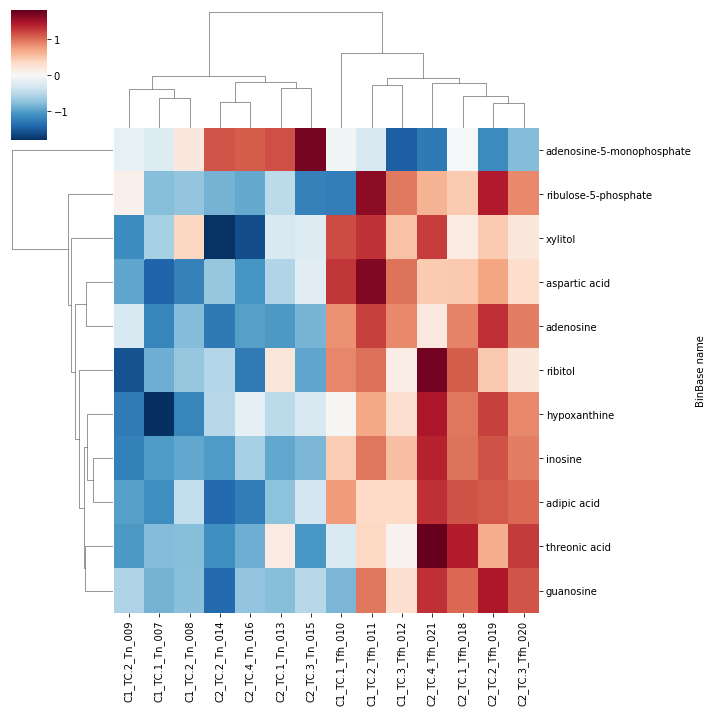

In [54]:
p_threshold = 0.05 #
mydata = pd.read_csv(infile)

mydata.index = mydata['BinBase name']

filt_df = mydata.loc[
          (mydata.padj_lim_ttest_tscore__TC_TfhvsTC_Tn < p_threshold),:] #

d = filt_df.loc[:,[x for x in mydata.columns if re.search("TC\.\d_*Tfh",x) 
        or re.search("TC\.\d_*Tn",x)]] #

g = sns.clustermap(d,col_cluster=True, z_score=0,cmap="RdBu_r") 
plt.show()

g.savefig("TC_TfhvsTn_padj_" + str(p_threshold) + ".pdf", bbox_inches='tight') #

# only TfhvsTn in B6

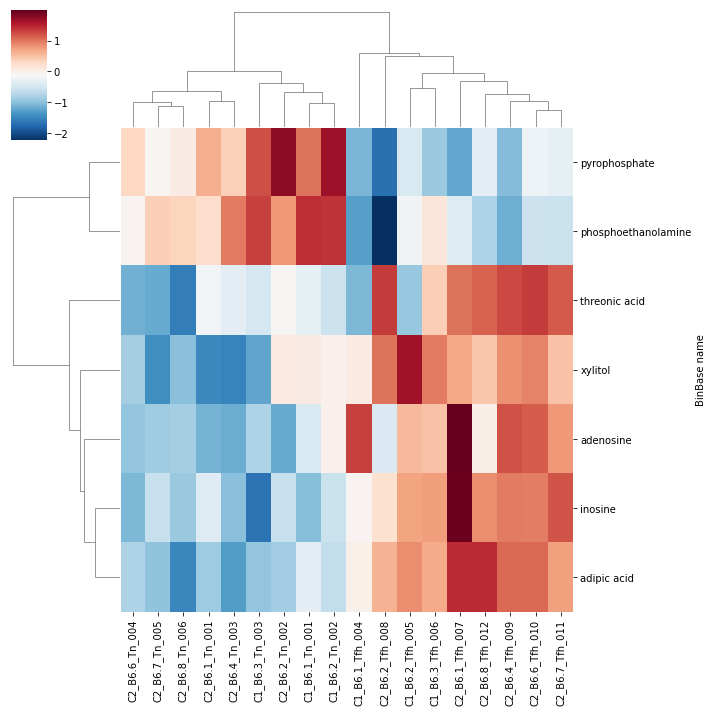

In [55]:
p_threshold = 0.05 #
mydata = pd.read_csv(infile)

mydata.index = mydata['BinBase name']

filt_df = mydata.loc[
          (mydata.padj_lim_ttest_tscore__B6_TfhvsB6_Tn < p_threshold),:] #

d = filt_df.loc[:,[x for x in mydata.columns if re.search("B6\.\d_*Tfh",x) 
        or re.search("B6\.\d_*Tn",x)]] #

g = sns.clustermap(d,col_cluster=True, z_score=0,cmap="RdBu_r")
plt.show()

g.savefig("B6_TfhvsTn_padj_" + str(p_threshold) + ".pdf", bbox_inches='tight') #